In [1]:
range(3)

[0, 1, 2]

In [2]:
import wasabiplot as wp

In [3]:
%load_ext autoreload
%autoreload 2

In [166]:
cd /home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws

/oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws


In [167]:
from __future__ import print_function

import glob
bam_filenames_rmdup = glob.glob('rmdup/*.bam')



In [168]:
from __future__ import print_function

import glob
bam_filenames = glob.glob('*.bam')


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')

%matplotlib inline

In [170]:
from outrigger.region import Region

snap25_mxe_event = 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'

snap25_exons = snap25_mxe_event.split('@')
snap25_regions = map(Region, snap25_exons)
snap25_regions

[outrigger.Region (exon:chr20:10265372-10265420:+),
 outrigger.Region (exon:chr20:10273530-10273647:+),
 outrigger.Region (exon:chr20:10273809-10273926:+),
 outrigger.Region (exon:chr20:10277573-10277698:+)]

In [171]:
chrom = snap25_regions[0].chrom
start = snap25_regions[0].start
stop = snap25_regions[-1].stop
strand = snap25_regions[0].strand


In [172]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

# not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2017-01-13 08:52:10	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2017-01-13 08:52:10	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-13 08:53:59 	Initializing Study
2017-01-13 08:53:59 	Initializing Predictor configuration manager for Study
2017-01-13 08:53:59	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-13 08:53:59	Added ExtraTreesClassifier to default predictors
2017-01-13 08:53:59	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-13 08:53:59	Added ExtraTreesRegressor to default predictors
2017-01-13 08:53:59	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradien

Error loading species hg19 data: HTTP Error 404: Not Found

In [173]:
splicing = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing.csv', index_col=0)
print(splicing.shape)
splicing.head()

(299, 26987)


,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@exon:chr10:101514286-101514391:+@junction:chr10:101514392-101515381:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@novel_exon:chr10:101514286-101514333:+@junction:chr10:101514334-101515381:+,...,isoform1=junction:chrY:14798536-14821320:+@exon:chrY:14821321-14821476:+@junction:chrY:14821477-14832521:+|isoform2=junction:chrY:14798536-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14832521:+,isoform1=junction:chrY:14802371-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14820885:+|isoform2=junction:chrY:14802371-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14820885:+,isoform1=junction:chrY:14802371-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+|isoform2=junction:chrY:14802371-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14821320:+,isoform1=junction:chrY:14813985-14820885:+@novel_exon:chrY:14820886-14820960:+@junction:chrY:14820961-14821320:+|isoform2=junction:chrY:14813985-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+,isoform1=junction:chrY:14891581-14902339:+@exon:chrY:14902340-14902465:+@junction:chrY:14902466-14903431:+|isoform2=junction:chrY:14891581-14898454:+@exon:chrY:14898455-14898733:+@junction:chrY:14898734-14903431:+,isoform1=junction:chrY:15470434-15471646:-@exon:chrY:15470344-15470433:-@junction:chrY:15469850-15470343:-|isoform2=junction:chrY:15471103-15471646:-@exon:chrY:15470968-15471102:-@junction:chrY:15469850-15470967:-,isoform1=junction:chrY:16634822-16831338:+@exon:chrY:16831339-16831398:+@junction:chrY:16831399-16834996:+|isoform2=junction:chrY:16634822-16733888:+@exon:chrY:16733889-16734471:+@junction:chrY:16734472-16834996:+,isoform1=junction:chrY:21207178-21237826:-@exon:chrY:21207128-21207177:-@junction:chrY:21206582-21207127:-|isoform2=junction:chrY:21230685-21237826:-@exon:chrY:21230610-21230684:-@junction:chrY:21206582-21230609:-,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21751406:+@exon:chrY:21751407-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21901549-21903620:-@exon:chrY:21901414-21901548:-@junction:chrY:21897637-21901413:-|isoform2=junction:chrY:21903375-21903620:-@exon:chrY:21903204-21903374:-@junction:chrY:21897637-21903203:-
CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.

In [174]:
splicing.index = splicing.index.map(lambda x: '_'.join(x.split('_')[:2]))
splicing.head()

,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@exon:chr10:101514286-101514391:+@junction:chr10:101514392-101515381:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@novel_exon:chr10:101514286-101514333:+@junction:chr10:101514334-101515381:+,...,isoform1=junction:chrY:14798536-14821320:+@exon:chrY:14821321-14821476:+@junction:chrY:14821477-14832521:+|isoform2=junction:chrY:14798536-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14832521:+,isoform1=junction:chrY:14802371-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14820885:+|isoform2=junction:chrY:14802371-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14820885:+,isoform1=junction:chrY:14802371-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+|isoform2=junction:chrY:14802371-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14821320:+,isoform1=junction:chrY:14813985-14820885:+@novel_exon:chrY:14820886-14820960:+@junction:chrY:14820961-14821320:+|isoform2=junction:chrY:14813985-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+,isoform1=junction:chrY:14891581-14902339:+@exon:chrY:14902340-14902465:+@junction:chrY:14902466-14903431:+|isoform2=junction:chrY:14891581-14898454:+@exon:chrY:14898455-14898733:+@junction:chrY:14898734-14903431:+,isoform1=junction:chrY:15470434-15471646:-@exon:chrY:15470344-15470433:-@junction:chrY:15469850-15470343:-|isoform2=junction:chrY:15471103-15471646:-@exon:chrY:15470968-15471102:-@junction:chrY:15469850-15470967:-,isoform1=junction:chrY:16634822-16831338:+@exon:chrY:16831339-16831398:+@junction:chrY:16831399-16834996:+|isoform2=junction:chrY:16634822-16733888:+@exon:chrY:16733889-16734471:+@junction:chrY:16734472-16834996:+,isoform1=junction:chrY:21207178-21237826:-@exon:chrY:21207128-21207177:-@junction:chrY:21206582-21207127:-|isoform2=junction:chrY:21230685-21237826:-@exon:chrY:21230610-21230684:-@junction:chrY:21206582-21230609:-,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21751406:+@exon:chrY:21751407-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21901549-21903620:-@exon:chrY:21901414-21901548:-@junction:chrY:21897637-21901413:-|isoform2=junction:chrY:21903375-21903620:-@exon:chrY:21903204-21903374:-@junction:chrY:21897637-21903203:-
CVN_01,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,Na

In [175]:
[x for x in splicing.columns if x.startswith('isoform1=junction:chr20:1026')]

['isoform1=junction:chr20:10265421-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+',
 'isoform1=junction:chr20:10265421-10277572:+|isoform2=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+',
 'isoform1=junction:chr20:10265421-10286776:+|isoform2=junction:chr20:10265421-10280018:+@novel_exon:chr20:10280019-10280060:+@junction:chr20:10280061-10286776:+',
 'isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+']

In [176]:
def make_bam_df(bam_filenames, name='bam'):
    bam_df = pd.Series(sorted(bam_filenames), name=name).to_frame()
    bam_df['sample_id'] = bam_df[name].map(lambda x: '_'.join(os.path.basename(x).split('.')[0].split('_')[:2]))
    bam_df = bam_df.set_index('sample_id')
    return bam_df

In [177]:
import pandas as pd
import os

bam_df = make_bam_df(bam_filenames)
rmdup_df = make_bam_df(bam_filenames_rmdup, name='rmdup')
bam_df = bam_df.join(rmdup_df)
bam_df['phenotype'] = study.sample_id_to_phenotype
bam_df['pooled'] = study.metadata.data['pooled']
bam_df['single'] = study.metadata.data['single']
bam_df['outlier'] = study.metadata.data['outlier']
bam_df.head()

,bam,rmdup,phenotype,pooled,single,outlier
sample_id,,,,,,
CVN_01,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_01_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_02,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_02_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_03,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_03_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_04,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_04_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_05,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_05_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False


In [178]:
bam_df['phenotype'] = pd.Categorical(bam_df['phenotype'], categories=study.phenotype_order, ordered=True)
bam_df.head()

,bam,rmdup,phenotype,pooled,single,outlier
sample_id,,,,,,
CVN_01,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_01_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_02,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_02_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_03,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_03_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_04,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_04_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False
CVN_05,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_05_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False


In [179]:
bam_df = bam_df.dropna()

In [180]:
def assign_color(row):
    if row.single:
        return study.phenotype_to_color[row.phenotype]
    elif row.pooled:
        return 'black'
    elif row.outlier:
        return 'grey'

def assign_label(row):
    if row.single:
        return 'single ' + row.phenotype
    elif row.pooled:
        return 'pooled'
    elif row.outlier:
        return 'outlier'


    
bam_df['label'] = bam_df.apply(assign_label, axis=1)
bam_df['color'] = bam_df.apply(assign_color, axis=1)
bam_df.head()

,bam,rmdup,phenotype,pooled,single,outlier,label,color
sample_id,,,,,,,,
CVN_01,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_01_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476
CVN_02,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_02_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476
CVN_03,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_03_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476
CVN_04,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_04_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476
CVN_05,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_05_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476


In [181]:
label_to_color = dict(bam_df[['label', 'color']].values)
label_to_color

{'pooled': 'black',
 u'single MN': u'#228a44',
 u'single NPC': u'#73c476',
 u'single iPSC': u'#c7e9c0'}

In [182]:
bam_df = bam_df.sort_values(['phenotype', 'single', 'outlier'])
bam_df.head()

,bam,rmdup,phenotype,pooled,single,outlier,label,color
sample_id,,,,,,,,
M2nd_33,M2nd_33_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,rmdup/M2nd_33_R1.fastq.gz.polyATrim.adapterTri...,iPSC,True,False,False,pooled,black
M2nd_34,M2nd_34_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,rmdup/M2nd_34_R1.fastq.gz.polyATrim.adapterTri...,iPSC,True,False,False,pooled,black
P1_01,P1_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/P1_01_R1.fastq.gz.polyATrim.adapterTrim....,iPSC,False,True,False,single iPSC,#c7e9c0
P1_02,P1_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/P1_02_R1.fastq.gz.polyATrim.adapterTrim....,iPSC,False,True,False,single iPSC,#c7e9c0
P1_03,P1_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/P1_03_R1.fastq.gz.polyATrim.adapterTrim....,iPSC,False,True,False,single iPSC,#c7e9c0


In [183]:
study.supplemental.modalities_tidy.head()

,phenotype,event_id,modality
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,included
1,MN,isoform1=junction:chr10:101476219-101480743:-|...,bimodal
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,included
3,MN,isoform1=junction:chr10:102283687-102286731:-|...,included
4,MN,isoform1=junction:chr10:102746733-102747069:-|...,bimodal


## SNAP25

In [185]:
snap25_event = u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'

In [186]:
study.splicing.maybe_renamed_to_feature_id('DYNC1I2')

Index([u'isoform1=junction:chr2:172544138-172546656:+|isoform2=junction:chr2:172544138-172544980:+@exon:chr2:172544981-172545158:+@junction:chr2:172545159-172546656:+',
       u'isoform1=junction:chr2:172582224-172583300:+|isoform2=junction:chr2:172582224-172582428:+@exon:chr2:172582429-172582803:+@junction:chr2:172582804-172583300:+',
       u'isoform1=junction:chr2:172582592-172583300:+|isoform2=junction:chr2:172582592-172582703:+@exon:chr2:172582704-172582803:+@junction:chr2:172582804-172583300:+'],
      dtype='object')

In [187]:
dync1i2_event = u'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+'

In [188]:
events = snap25_event, dync1i2_event
events

(u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+',
 u'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+')

In [189]:
snap25_event = 'isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+'


In [190]:
snap25_splicing = splicing[snap25_event].dropna()
snap25_splicing.head()

CVN_06    1.000000
CVN_11    0.000000
CVN_13    1.000000
CVN_17    0.813559
CVN_19    1.000000
Name: isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+, dtype: float64

In [191]:
snap25_splicing.shape

(69,)

In [192]:
bam_df.head()

,bam,rmdup,phenotype,pooled,single,outlier,label,color
sample_id,,,,,,,,
M2nd_33,M2nd_33_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,rmdup/M2nd_33_R1.fastq.gz.polyATrim.adapterTri...,iPSC,True,False,False,pooled,black
M2nd_34,M2nd_34_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,rmdup/M2nd_34_R1.fastq.gz.polyATrim.adapterTri...,iPSC,True,False,False,pooled,black
P1_01,P1_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/P1_01_R1.fastq.gz.polyATrim.adapterTrim....,iPSC,False,True,False,single iPSC,#c7e9c0
P1_02,P1_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/P1_02_R1.fastq.gz.polyATrim.adapterTrim....,iPSC,False,True,False,single iPSC,#c7e9c0
P1_03,P1_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/P1_03_R1.fastq.gz.polyATrim.adapterTrim....,iPSC,False,True,False,single iPSC,#c7e9c0


In [193]:
snap25_bam = bam_df.join(snap25_splicing).dropna(subset=[snap25_splicing.name]).dropna()
print(snap25_bam.shape)
snap25_bam.head()

(46, 9)


,bam,rmdup,phenotype,pooled,single,outlier,label,color,isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+
sample_id,,,,,,,,,
CVN_17,CVN_17_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_17_R1.fastq.gz.polyATrim.adapterTrim...,NPC,True,False,False,pooled,black,0.813559
CVN_35,CVN_35_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_35_R1.fastq.gz.polyATrim.adapterTrim...,NPC,True,False,False,pooled,black,0.402597
N4_05,N4_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup/N4_05_R1.fastq.gz.polyATrim.adapterTrim....,NPC,True,False,False,pooled,black,0.071429
CVN_06,CVN_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_06_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476,1.000000
CVN_11,CVN_11_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup/CVN_11_R1.fastq.gz.polyATrim.adapterTrim...,NPC,False,True,False,single NPC,#73c476,0.000000


In [194]:
def wasabifacet(x, **kwargs):
    return wp.wasabiplot(x.iloc[0], **kwargs)

In [195]:
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [196]:
import os

In [197]:
figure_folder = '~/ipython_notebook/singlecell/manuscript/figures/001_wasabi_plots_snap25_dync1i2'
! mkdir -p $figure_folder

IOError: [Errno 2] No such file or directory: '~/ipython_notebook/singlecell/manuscript/figures/001_wasabi_plots_snap25_dync1i2/snap25_bam.pdf'

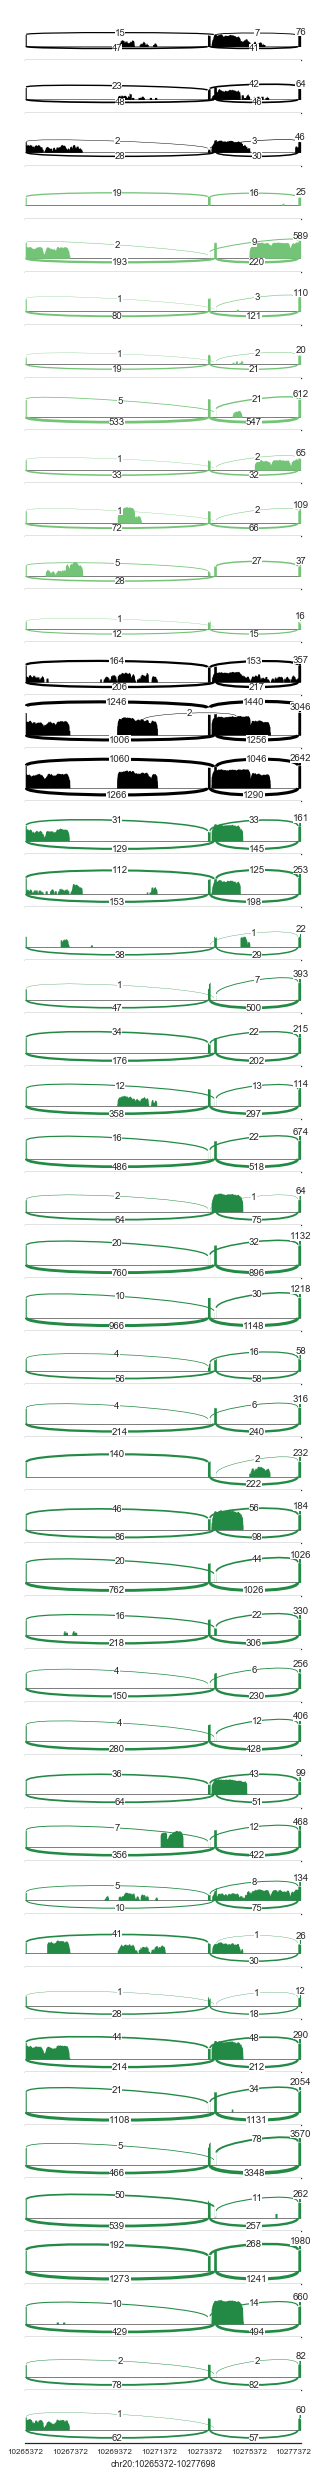

In [198]:
g = sns.FacetGrid(snap25_bam, row='bam', hue='label', size=0.75, aspect=6, palette=label_to_color)
g.map(wasabifacet, 'bam', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)

g.set_titles('')

for ax in g.axes.flat:
#     title = ax.get_title()
#     bamfile = title.split()[-1]
#     sample_id = '_'.join(os.path.basename(bamfile).split('_')[:2])
#     ax.set(title=sample_id)
    ax.set(yticks=[])
sns.despine(left=True)
ax.set(xlabel='{chrom}:{start}-{stop}'.format(chrom=chrom, start=start, stop=stop))
g.fig.tight_layout(h_pad=0.0001)
g.savefig('{}/snap25_bam.pdf'.format(figure_folder))

In [ ]:
g = sns.FacetGrid(snap25_bam, row='rmdup', hue='label', size=0.75, aspect=6, palette=label_to_color)
g.map(wasabifacet, 'rmdup', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)

g.set_titles('')

# for ax in g.axes.flat:
#     title = ax.get_title()
#     bamfile = title.split()[-1]
#     sample_id = '_'.join(os.path.basename(bamfile).split('_')[:2])
#     ax.set(title=sample_id)
ax.set(yticks=[])
ax.set(xlabel='{chrom}:{start}-{stop}'.format(chrom=chrom, start=start, stop=stop))
g.fig.tight_layout(h_pad=0.0001)
g.savefig('{}/snap25_rmdup.pdf'.format(figure_folder))

## DYNC1I2

In [ ]:
dync1i2_event = u'isoform1=junction:chr2:172563888-172571837:+|isoform2=junction:chr2:172563888-172569276:+@exon:chr2:172569277-172569336:+@junction:chr2:172569337-172571837:+'

In [ ]:
dync1i2_splicing = splicing[dync1i2_event].dropna()
dync1i2_splicing.head()

In [ ]:
dync1i2_bam = bam_df.join(dync1i2_splicing).dropna(subset=[dync1i2_splicing.name]).dropna()
print(dync1i2_bam.shape)
dync1i2_bam.head()

In [153]:
from outrigger.region import Region

In [157]:
dync1i2_event_location = 'event:chr2:172563800-172571886:+'
dynci12_region = Region(dync1i2_event_location)

ValueError: left cannot be >= right

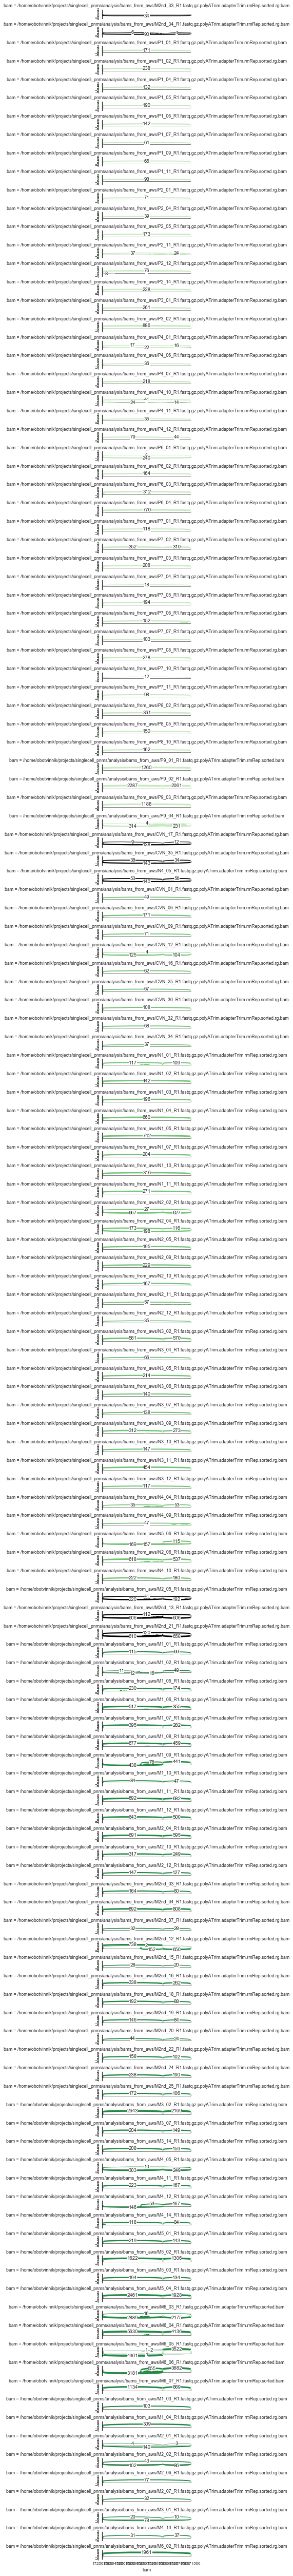

In [165]:
g = sns.FacetGrid(dync1i2_bam, row='bam', hue='label', size=0.5, aspect=6, palette=label_to_color)
g.map(wasabifacet, 'bam', 
      chrom=dynci12_region.chrom, 
      start=dynci12_region.start, 
      stop=dynci12_region.stop, 
      strand=dynci12_region.strand, 
      warn_skipped=False)

g.set_titles('')

# for ax in g.axes.flat:
#     title = ax.get_title()
#     bamfile = title.split()[-1]
#     sample_id = '_'.join(os.path.basename(bamfile).split('_')[:2])
#     ax.set(title=sample_id)
ax.set(yticks=[])
ax.set(xlabel='{chrom}:{start}-{stop}'.format(chrom=chrom, start=start, stop=stop))
g.fig.tight_layout(h_pad=0)
g.savefig('{}/dync1i2_bam.pdf'.format(figure_folder))

In [ ]:
g = sns.FacetGrid(dync1i2_bam, row='rmdup', hue='label', size=0.5, aspect=6, palette=label_to_color)
g.set_titles('')

# for ax in g.axes.flat:
#     title = ax.get_title()
#     bamfile = title.split()[-1]
#     sample_id = '_'.join(os.path.basename(bamfile).split('_')[:2])
#     ax.set(title=sample_id)

for ax in g.axes.flat:
    title = ax.get_title()
    bamfile = title.split()[-1]
    sample_id = '_'.join(os.path.basename(bamfile).split('_')[:2])
    ax.set(title=sample_id)
ax.set(yticks=[])
ax.set(xlabel='{chrom}:{start}-{stop}'.format(chrom=chrom, start=start, stop=stop))
g.fig.tight_layout(h_pad=0)
g.savefig('{}/dync1i2_rmdup.pdf'.format(figure_folder))